## 12.5.1 Principal component analysis

To run in Colab,
* click this button
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ssuai/machine_learning/blob/main/lab6-1_PCA.ipynb)
* run the following cell

In [ ]:
# clone the data folder
!git clone https://github.com/ssuai/machine_learning_data.git data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [3]:
df = pd.read_csv('data/USArrests.csv')

# reorder columns for better interpretation
feature_names = ['Murder', 'Assault', 'Rape', 'UrbanPop']
df = df.reindex(columns=['State'] + feature_names)

df.head()

,State,Murder,Assault,Rape,UrbanPop
0,Alabama,13.2,236,21.2,58
1,Alaska,10.0,263,44.5,48
2,Arizona,8.1,294,31.0,80
3,Arkansas,8.8,190,19.5,50
4,California,9.0,276,40.6,91


In [4]:
df.describe()

,Murder,Assault,Rape,UrbanPop
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,21.232000,65.540000
std,4.35551,83.337661,9.366385,14.474763
min,0.80000,45.000000,7.300000,32.000000
25%,4.07500,109.000000,15.075000,54.500000
50%,7.25000,159.000000,20.100000,66.000000
75%,11.25000,249.000000,26.175000,77.750000
max,17.40000,337.000000,46.000000,91.000000


<AxesSubplot:>

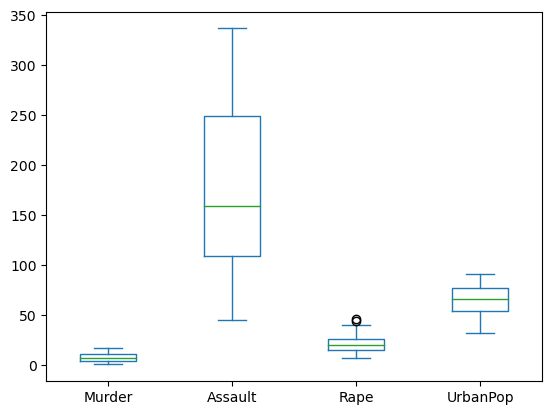

In [5]:
df.plot.box()

In [6]:
pca = make_pipeline(StandardScaler(), PCA(n_components=2))

X = df[feature_names]
pca.fit(X)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=2))])

In [7]:
# principal component loadings
pca['pca'].components_.T

array([[ 0.53589947,  0.41818087],
       [ 0.58318363,  0.1879856 ],
       [ 0.54343209, -0.16731864],
       [ 0.27819087, -0.87280619]])

In [8]:
# flip the sign of the 2nd PC to match the textbook
pca['pca'].components_[1] *= -1

loadings = pca['pca'].components_.T
loadings

array([[ 0.53589947, -0.41818087],
       [ 0.58318363, -0.1879856 ],
       [ 0.54343209,  0.16731864],
       [ 0.27819087,  0.87280619]])

In [9]:
XX = pca.transform(X)
XX.shape

(50, 2)

(-3.2924890092831194,
 3.313305664552477,
 -2.5920087865787647,
 1.7686728119774953)

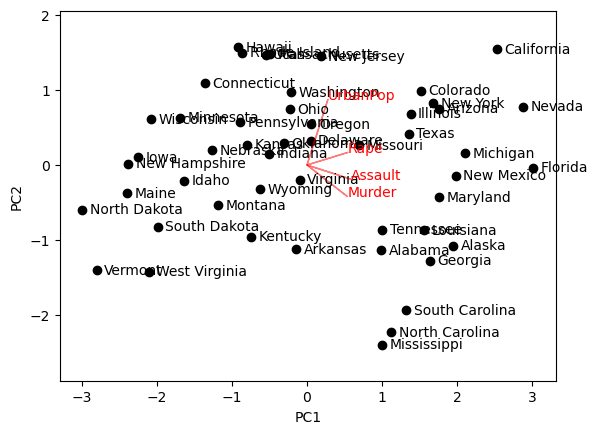

In [10]:
# plot projected data
plt.scatter(XX[:,0], XX[:,1], color='k')
for i, state in enumerate(df['State']):
    plt.text(XX[i,0]+0.1, XX[i,1]-0.05, state)
    
# plot the loadings
for i, feature in enumerate(loadings):
    plt.arrow(0, 0, feature[0], feature[1], color='r', alpha=0.5)
    plt.text(feature[0], feature[1], f"{feature_names[i]}", color='r')
    
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.axis('equal')
# plt.grid('on')

In [11]:
pca['pca'].explained_variance_ratio_

array([0.62006039, 0.24744129])